**Q2) KNN**

Multi-class classification problem. 
Task is to classify the give car dataset into 4 classes:

Unacceptable /Acceptable /Good /Very good

**Independent Variables:**

* Buying: buying price

* Maint: maintenance price

* Doors: numbers of doors

* Persons: capacity in terms of persons to carry

* Lug_boot: Size of luggage boot

* Safety: estimated safety of the car

**Target variable:**

* Evaluation

In [ ]:
import io
import math as mt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

**1.Reading dataset**

In [ ]:
"""
#download 'car_evaluation.csv' from Kaggle
!pip install kaggle
!kaggle datasets download -d elikplim/car-evaluation-data-set
!unzip '*.zip'
"""

"\n#download 'car_evaluation.csv' from Kaggle\n!pip install kaggle\n!kaggle datasets download -d elikplim/car-evaluation-data-set\n!unzip '*.zip'\n"

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
#Add header to the data set
headerList = ['Buying', 'Maint', 'Doors','Persons','Lug_boot','Safety','Evaluation']
#Read the CSV file
dataset = pd.read_csv(io.BytesIO(uploaded['car_evaluation.csv']) ,names=headerList)
dataset

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
#Visualize unique values in each column dataset
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print() 

Unique values in Buying:
['vhigh' 'high' 'med' 'low']

Unique values in Maint:
['vhigh' 'high' 'med' 'low']

Unique values in Doors:
['2' '3' '4' '5more']

Unique values in Persons:
['2' '4' 'more']

Unique values in Lug_boot:
['small' 'med' 'big']

Unique values in Safety:
['low' 'med' 'high']

Unique values in Evaluation:
['unacc' 'acc' 'vgood' 'good']



In [ ]:
# Checking whether null values are present
dataset.isnull().sum()

Buying        0
Maint         0
Doors         0
Persons       0
Lug_boot      0
Safety        0
Evaluation    0
dtype: int64

**2.Shuffling dataset**

In [ ]:
shuffled_dataset = dataset.sample(frac=1)
shuffled_dataset

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Evaluation
1539,low,med,3,2,small,low,unacc
988,med,high,2,4,big,med,acc
1457,low,high,3,more,big,high,vgood
626,high,high,5more,2,med,high,unacc
724,high,med,4,more,med,med,acc
...,...,...,...,...,...,...,...
1717,low,low,5more,4,big,med,good
1533,low,med,2,more,med,low,unacc
1094,med,med,2,4,med,high,acc
329,vhigh,low,2,2,med,high,unacc


**3.Splitting dataset**

In [ ]:
#Split the dataset into training ,Validation and testing sets
train=shuffled_dataset.iloc[:1000,:]
valid=shuffled_dataset.iloc[1000:1300,:]
test=shuffled_dataset.iloc[1300:1728,:]

**4.Encoding**

##### we need to transform the string values into numbers to be able to calculate distance matric.

In [ ]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
encoded_train = train.apply(lambda x: LabelEncoder().fit_transform(x))
encoded_valid = valid.apply(lambda x: LabelEncoder().fit_transform(x))
encoded_test = test.apply(lambda x: LabelEncoder().fit_transform(x))


#print(encoded_train)
#print(encoded_valid)
#print(encoded_test)

In [ ]:
# split training,testing and validation data set to (features and target)
X_train= encoded_train.drop(["Evaluation"],axis=1)
Y_train= encoded_train["Evaluation"]

X_valid= encoded_valid.drop(["Evaluation"],axis=1)
Y_valid= encoded_valid["Evaluation"]

X_test= encoded_test.drop(["Evaluation"],axis=1)
Y_test= encoded_test["Evaluation"]

In [ ]:
# Create and train the KNN classifier to the all traning data
knn_classifier = KNeighborsClassifier(n_neighbors=2)
X_tem=X_train.iloc[:1000,:]
Y_tem=Y_train[:1000]
knn_classifier.fit(X_tem, Y_tem) 

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [ ]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7336448598130841


**HeatMap to visualize confusion matrix for each iteration**

In [ ]:
def DrawTV_heatMap(yV_actual, yV_predict, yT_actual, yT_predict,Iteration_percentage):
    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    
    v = confusion_matrix(yV_actual, yV_predict)
    t = confusion_matrix(yT_actual, yT_predict)

    sns.heatmap(v, annot=True, fmt='d', cmap='YlGnBu', ax=axs[0])
    axs[0].set_xlabel('Predicted')
    axs[0].set_ylabel('Actual')
    axs[0].set_title(f'Validation with {Iteration_percentage}%')

    axs[0].set_xticklabels(['Accept','Good','Unaccept' ,'Very good'])
    axs[0].set_yticklabels(['Accept','Good','Unaccept' ,'Very good'])

    sns.heatmap(t, annot=True, fmt='d', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted')
    axs[1].set_ylabel('Actual')
    axs[1].set_title(f'Test with {Iteration_percentage}%')

    axs[1].set_xticklabels(['Accept','Good','Unaccept' ,'Very good'])
    axs[1].set_yticklabels(['Accept','Good','Unaccept' ,'Very good'])

    plt.tight_layout()
    plt.show()

**Function to visualize accuracy graph beside the accuracy table**

In [ ]:
def drawPlot(percentages, val_acc, test_acc):
    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    #Drawing graph
    axs[0].grid()
    axs[0].plot(percentages, val_acc, marker='o',color="r" ,label='Validation Accuracy')
    axs[0].plot(percentages, test_acc, marker='o',color="g" ,label='Testing Accuracy')
    axs[0].set_xlabel('Percentage of Training Set')
    axs[0].set_ylabel('Accuracy Score')
    axs[0].set_title('Impact of Training Set Size on KNN Performance')
    axs[0].set_xticks(percentages, [str(p) + '%' for p in percentages])
    axs[0].set_yticks(np.arange(0.0, 1.1, 0.1))
    axs[0].legend(loc="best")

    #create a dataFrame
    accuracy_table = {
        'Percentage of Training Set': [str(p) + '%' for p in percentages],
        'Validation Accuracy': ['{:.2f}'.format(acc) for acc in val_acc],
        'Test Accuracy': ['{:.2f}'.format(acc) for acc in test_acc]
    }
    df = pd.DataFrame(accuracy_table)
    df_styled=df.style.background_gradient(cmap='Blues')

    # Display DataFrame
    table = axs[1].table(cellText=df_styled.data.values, colLabels=df_styled.data.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    # Remove axis from the second subplot
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

**5.Trying different number of training samples to show the impact of number of training samples 10% : 100%**

In [ ]:
def Diff_Training_Size_VS_Test_Valid(estimator, X_train, y_train,X_valid,Y_valid, X_test, y_test):
   
    training_set_size = 1000
    val_acc = []
    test_acc = []
    YV_pred= []
    YT_pred= []
    # Generate a list of percentages
    percentages = np.arange(10, 110, 10)
    for percentage in percentages:
        # Calculate the number of samples to use for training
        training_samples = int((percentage / 100) * training_set_size)

        # Train the classifier on the subset of training data
        X_temp=X_train.iloc[:training_samples,:]
        Y_temp=Y_train[:training_samples]
        estimator.fit(X_temp, Y_temp)

        # Calculate the accuracy score for the validation set
        yv_pred = estimator.predict(X_valid)
        validation_acc = accuracy_score(Y_valid, yv_pred)
        val_acc.append(validation_acc)
        YV_pred.append(yv_pred)
        
        # Calculate the accuracy score for the testing set
        yt_pred = estimator.predict(X_test)
        testing_acc = accuracy_score(Y_test, yt_pred)
        test_acc.append(testing_acc)
        YT_pred.append(yt_pred)
        
        #Draw Test and Valudition for each size of the testing data
        DrawTV_heatMap(Y_valid, yv_pred,Y_test, yt_pred,percentage)
    return percentages, val_acc, test_acc

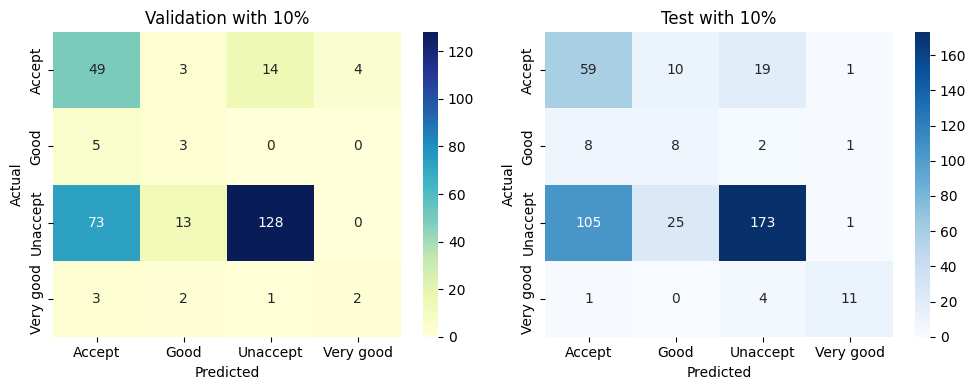

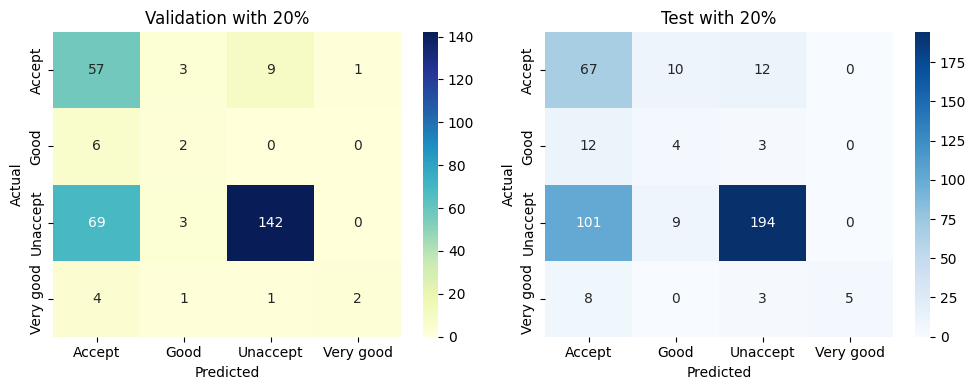

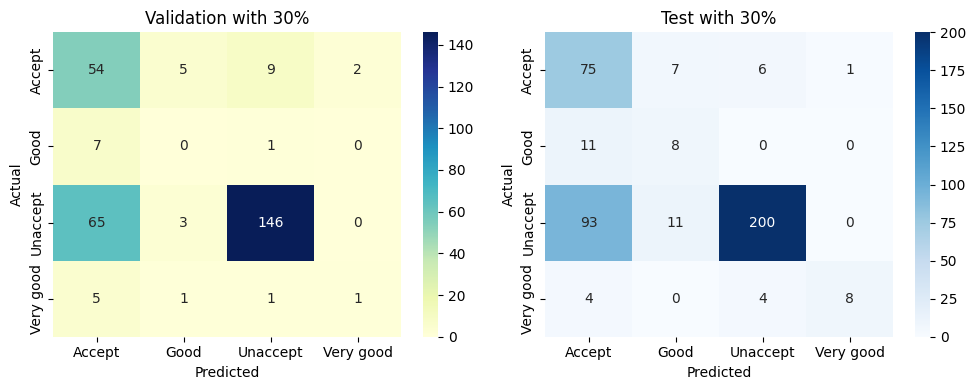

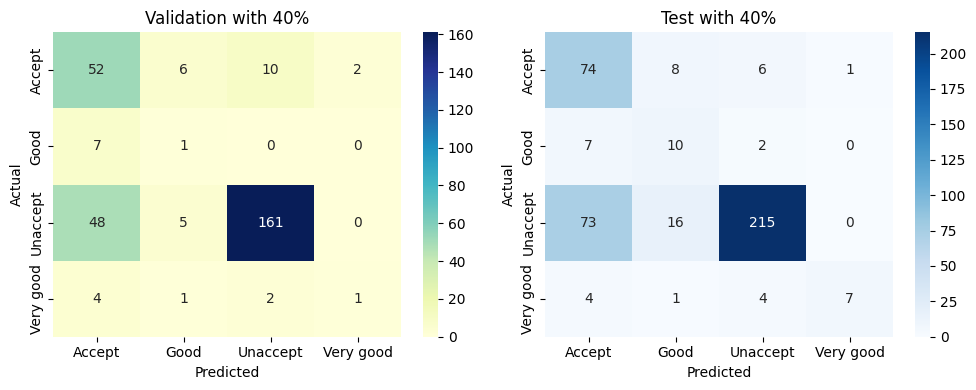

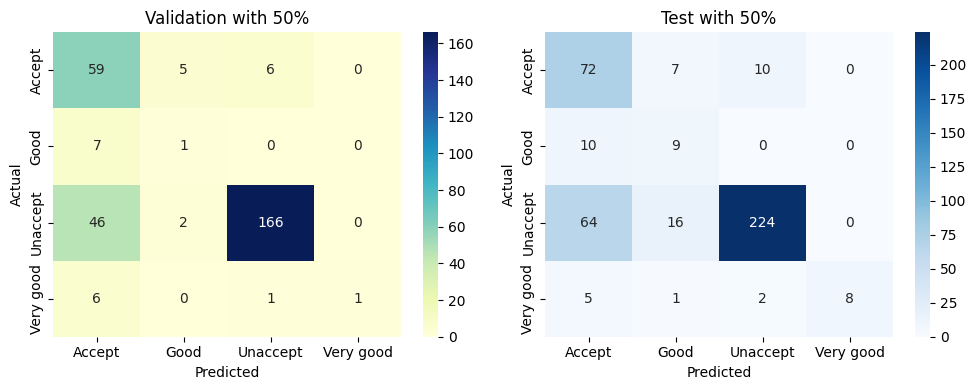

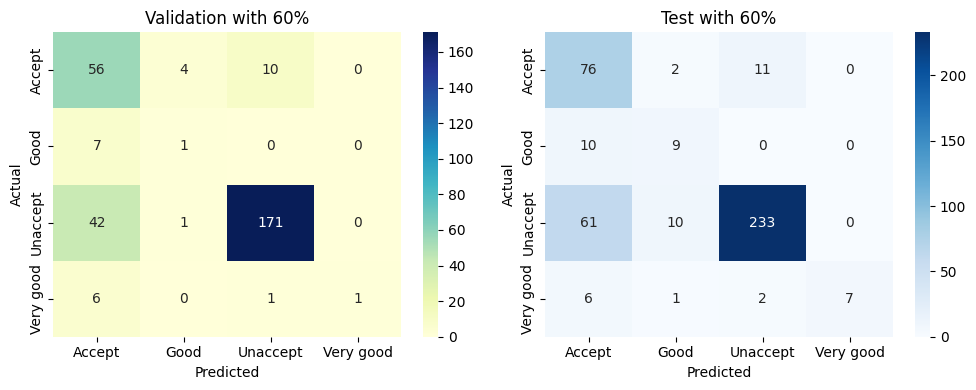

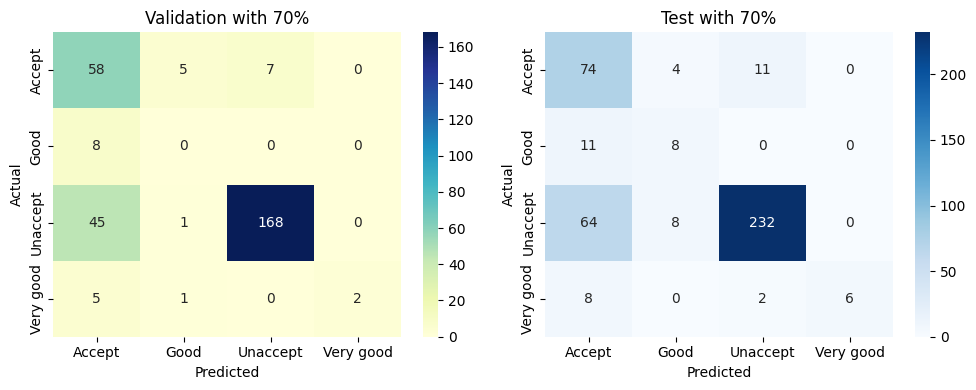

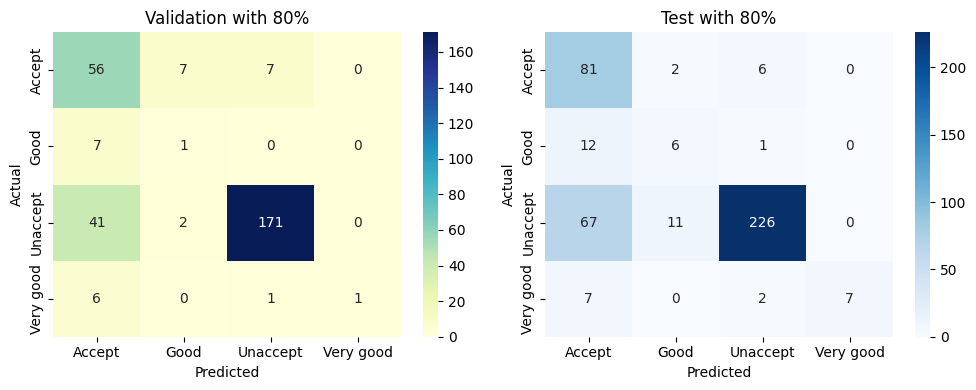

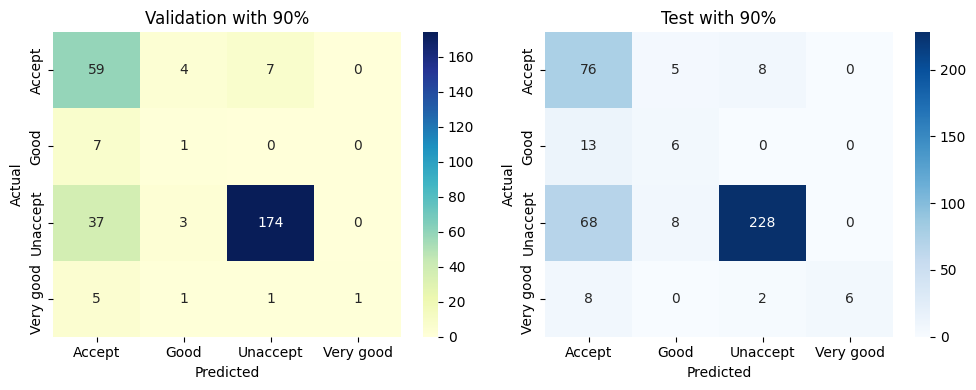

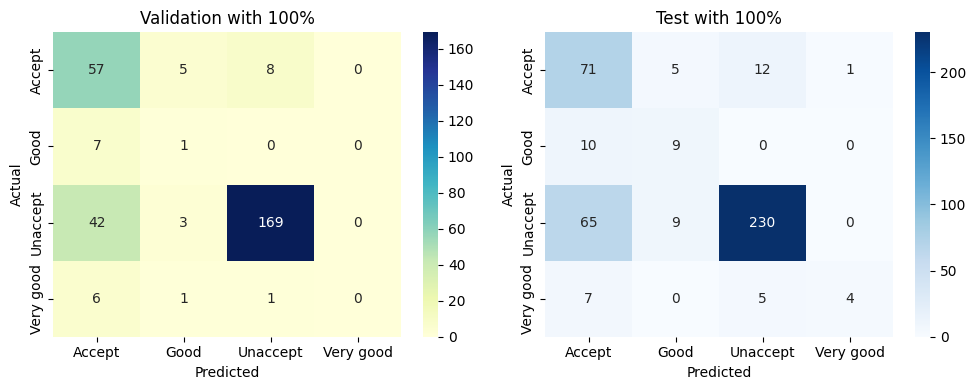

In [ ]:
# define the model
estimator = KNeighborsClassifier(n_neighbors=2)
## plot the curve
percentages, val_acc,test_acc= Diff_Training_Size_VS_Test_Valid(estimator, X_train, Y_train,X_valid,Y_valid, X_test, Y_test)

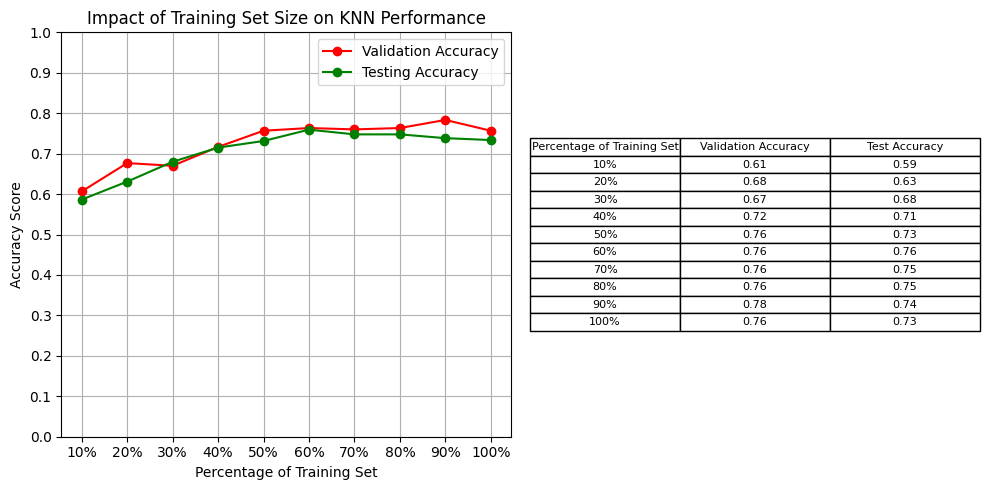

In [ ]:
drawPlot(percentages, val_acc, test_acc)

**Analysis Validation,Accuracy Graph that displayed above**

In [ ]:
def draw_dataset_Plot():
    # Create figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    percentages = np.arange(100, 1100, 100)
    dataSet_table=[]
    dataSet_Percentages_table=[]
    for p in percentages:
      dataSet_table.append({
            'Training Set': p,
            'Validation Set': 300 ,
            'Test Set': 428
        })
      dataSet_Percentages_table.append({ 
            'Percentage of Training Set': '{:.2f}'.format((p/(p+300+428))*100)+'%',
            'Percentage of Validation Set': '{:.2f}'.format((300/(p+300+428))*100)+'%' ,
            'Percentage of Test Set': '{:.2f}'.format((428/(p+300+428))*100)+'%'
        })
    
    df = pd.DataFrame(dataSet_table)
    df_styled=df.style.background_gradient(cmap='Blues')

    df2 = pd.DataFrame(dataSet_Percentages_table)
    df_styled2=df2.style.background_gradient(cmap='Blues')

    # Display DataFrame
    table = axs[0].table(cellText=df_styled.data.values, colLabels=df_styled.data.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    # Display DataFrame
    table = axs[1].table(cellText=df_styled2.data.values, colLabels=df_styled.data.columns, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    

    # Remove axis from the second subplot
    axs[0].axis('off')
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()

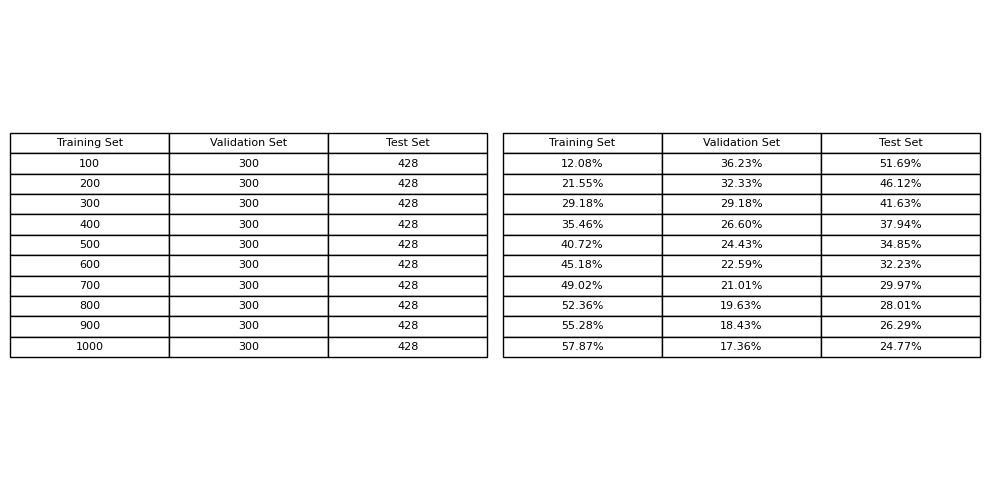

In [ ]:
draw_dataset_Plot()

**6.Use 100% of training samples, try to find the best K value**

find best K using Valuidation error

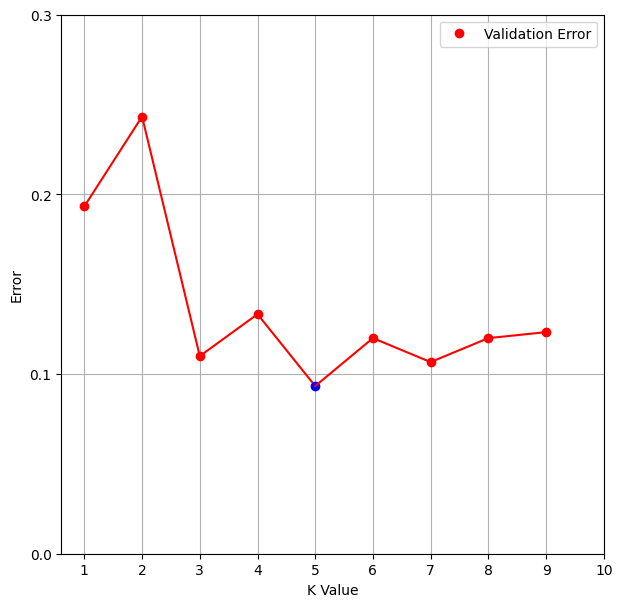

In [ ]:
def plot_Validation_Error(X_train, Y_train, X_Valid, Y_Valid, axes=None, ylim=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    axes = plt.figure(figsize=(7, 7)).gca()
    axes.set_xlabel("K Value")
    axes.set_ylabel("Error")

    Validation_Error_list = []
    length_list = []

    for i in range(1, 10):
        length_list.append(i)
        knn_classifier = KNeighborsClassifier(n_neighbors=i)
        knn_classifier.fit(X_train, Y_train)
        valid_predict = knn_classifier.predict(X_Valid)
        validation_error = 1 - accuracy_score(Y_Valid, valid_predict)
        Validation_Error_list.append(validation_error)

    # Find the index of the minimum validation error
    min_error_index = np.argmin(Validation_Error_list)

    # Plot learning curve points and lines
    axes.grid()
    
    for i in range(len(length_list)):
        if i == min_error_index:
            axes.plot(length_list[i], Validation_Error_list[i], 'bo')
        else:
            axes.plot(length_list[i], Validation_Error_list[i], 'ro')

        if i < len(length_list) - 1:
            axes.plot([length_list[i], length_list[i + 1]], [Validation_Error_list[i], Validation_Error_list[i + 1]], 'r')

    # Set x and y ticks
    plt.xticks(np.arange(1, 11, 1))
    plt.yticks(np.arange(0.0, 0.4, 0.1))

    axes.legend(["Validation Error"])
    plt.show()

# Plot the curve
plot_Validation_Error(X_train, Y_train, X_valid, Y_valid)


find best K using Testing error

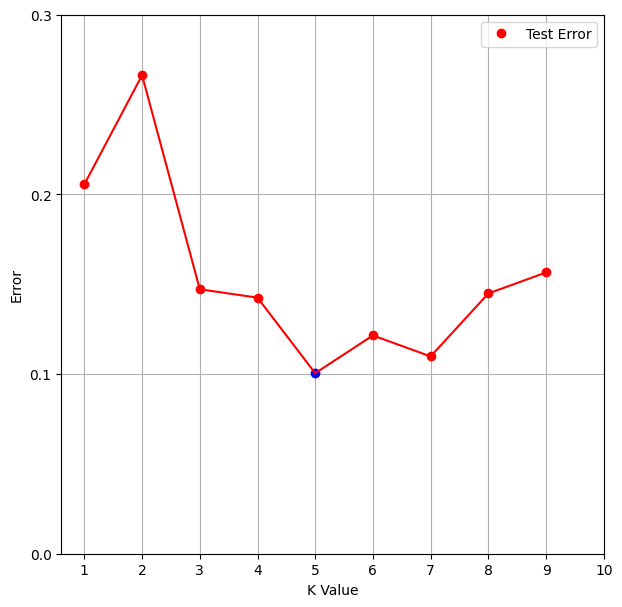

In [ ]:
def plot_Test_Error(X_train, Y_train, X_test, Y_test):
    axes = plt.figure(figsize=(7, 7)).gca()
    axes.set_xlabel("K Value")
    axes.set_ylabel("Error")

    test_Error_list = []
    length_list = []

    for i in range(1, 10):
        length_list.append(i)
        knn_classifier = KNeighborsClassifier(n_neighbors=i)
        knn_classifier.fit(X_train, Y_train)
        test_predict = knn_classifier.predict(X_test)
        validation_error = 1 - accuracy_score(Y_test, test_predict)
        test_Error_list.append(validation_error)

    # Find the index of the minimum test error
    min_error_index = np.argmin(test_Error_list)

    # Plot learning curve points
    axes.grid()
    
    for i in range(len(length_list)):
        if i == min_error_index:
            axes.plot(length_list[i], test_Error_list[i], 'bo')
        else:
            axes.plot(length_list[i], test_Error_list[i], 'ro')

    # Draw lines between adjacent points
    for i in range(len(length_list) - 1):
        axes.plot([length_list[i], length_list[i + 1]], [test_Error_list[i], test_Error_list[i + 1]], 'r')

    # Set x and y ticks
    plt.xticks(np.arange(1, 11, 1))
    plt.yticks(np.arange(0.0, 0.4, 0.1))

    axes.legend(["Test Error"])
    plt.show()

# Plot the curve
plot_Test_Error(X_train, Y_train, X_test, Y_test)


**e) k=5**

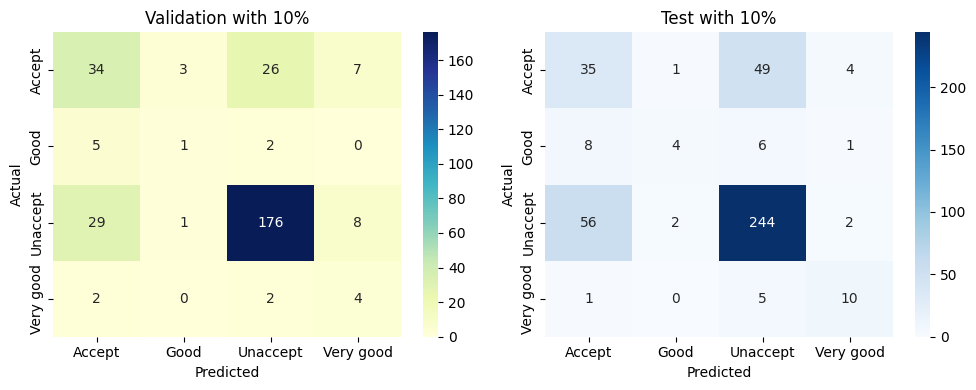

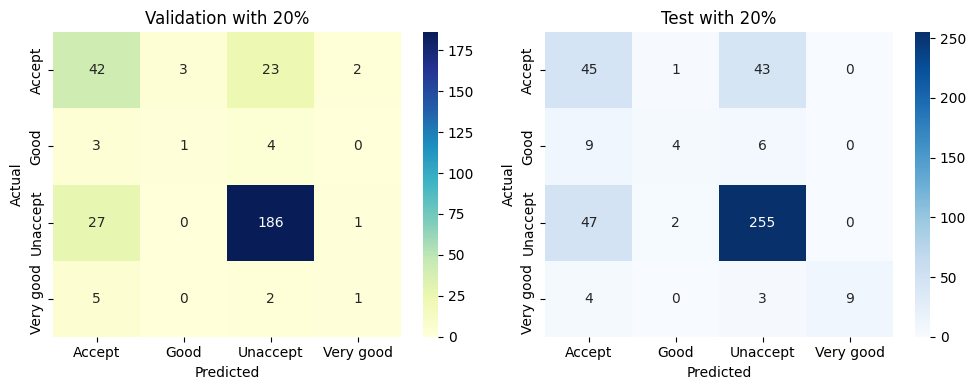

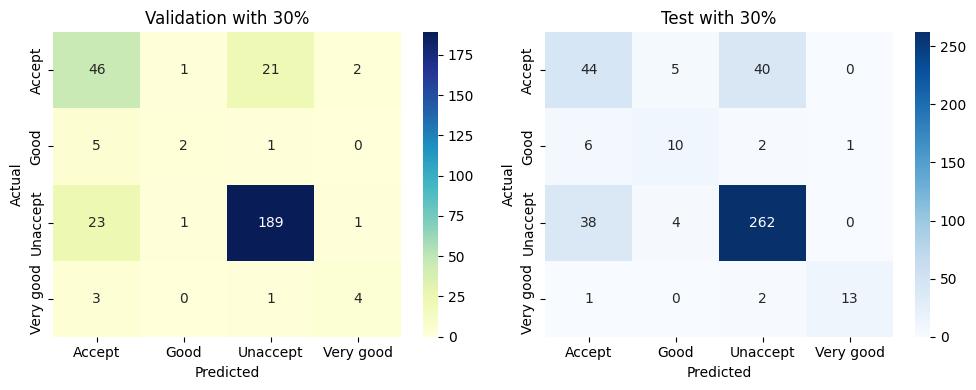

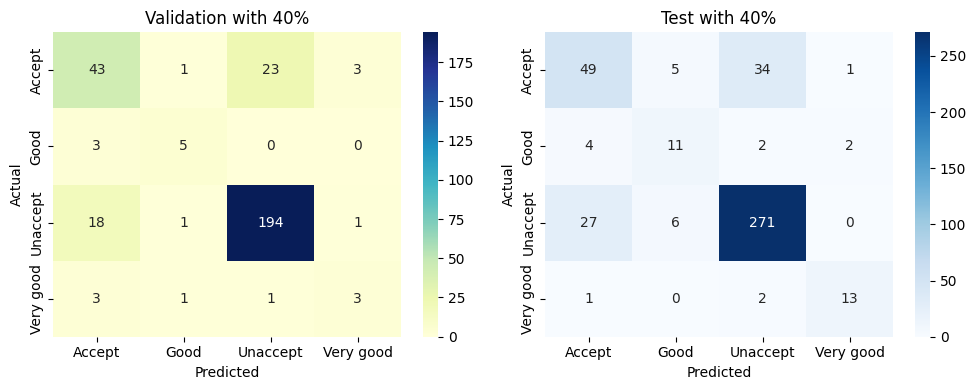

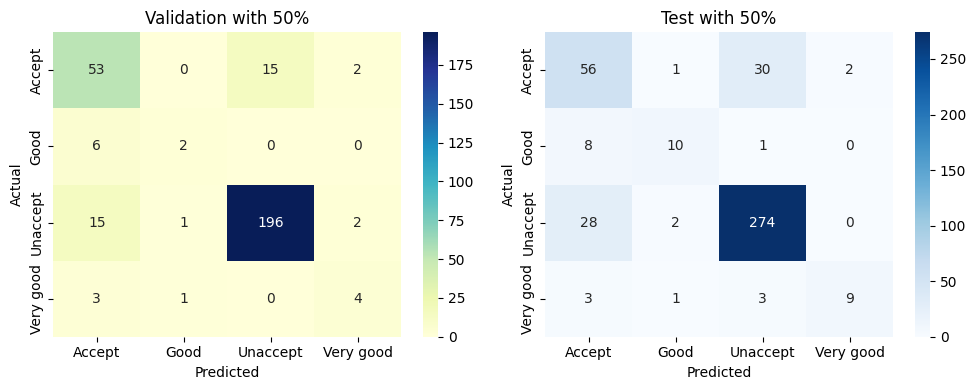

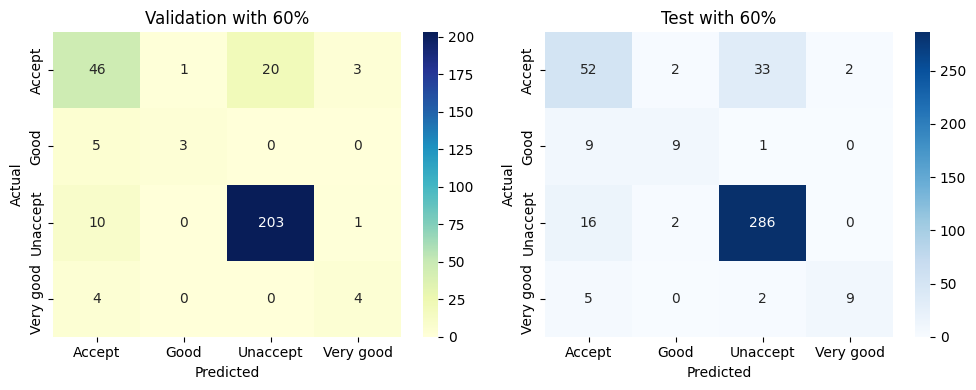

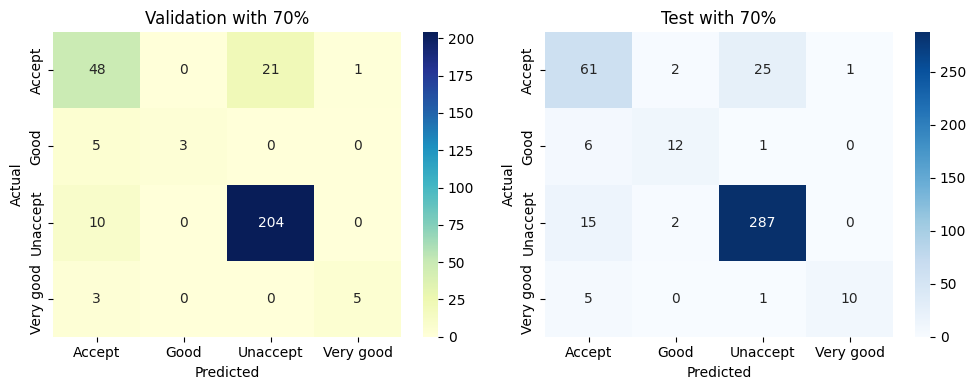

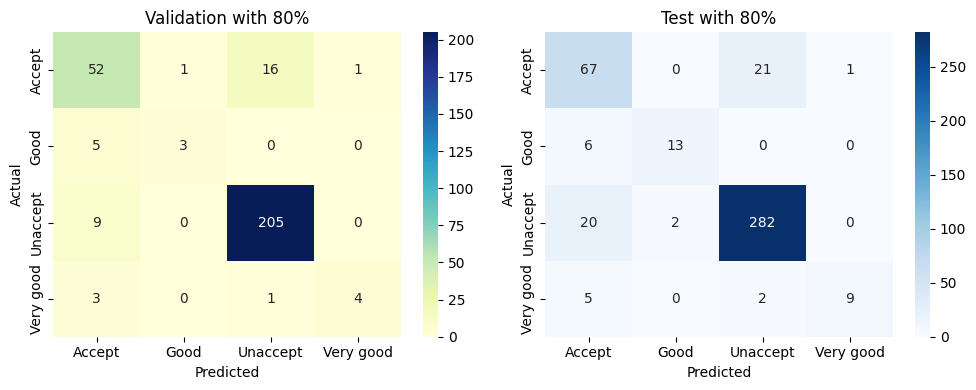

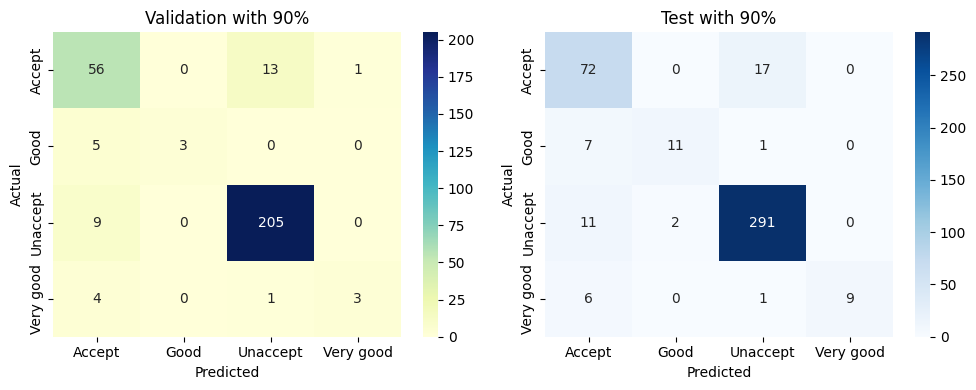

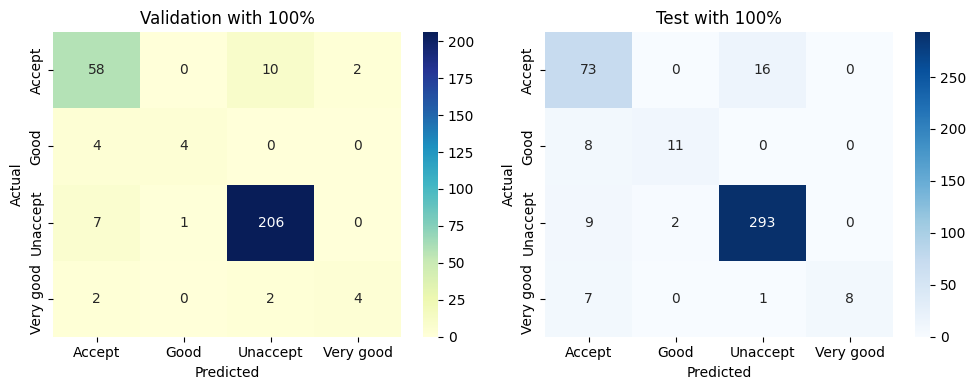

In [ ]:
# define the model
estimator = KNeighborsClassifier(n_neighbors=5)
## plot the curve
percentages, val_acc,test_acc= Diff_Training_Size_VS_Test_Valid(estimator, X_train, Y_train,X_valid,Y_valid, X_test, Y_test)

**K=5**

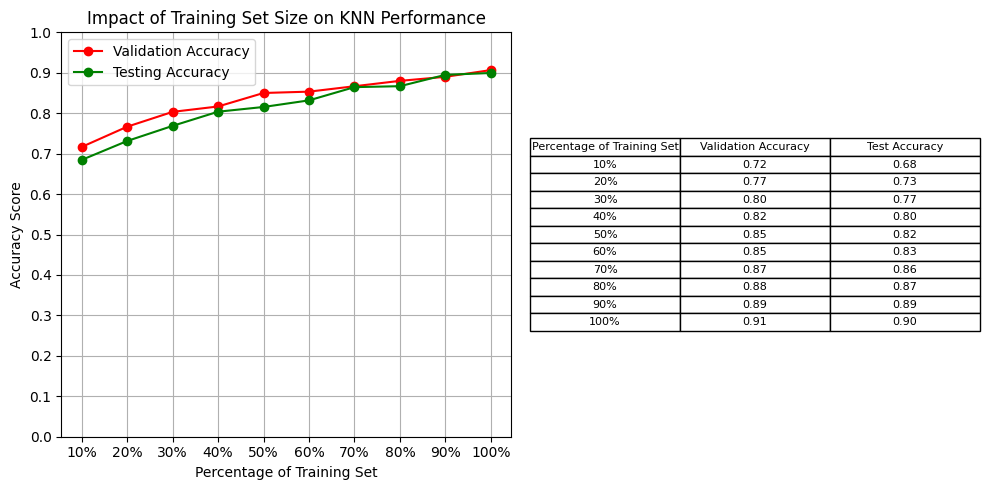

In [ ]:
drawPlot(percentages, val_acc, test_acc)
